# Kodera - Data Analitikası praktiki tapşırıqlar

Tapşırıqların çətinlik dərəcəsi asandan - çətinədir və bir çox tapşırıqlar yeni başlayanlar, 
az təcrübəsi olanlar üçün nəzərdə tutulmuşdur. Bəzi tapşırıqlar, yaxşı kodlama bacarığı ilə 
yanaşı, problemə praqmatik yanaşma tələb edir. 25 tapşırıqdan ibarət olan bu use-case i həll 
etmək üçün sizə 2019 cu il ərzində supermarketin 20 filialı üzrə alış - veriş edən 80.000 
alıcının almış olduğu 438.826 məhsulun verilənlərini özündə ehtiva edən dataset mövcuddur.

Dataseti əldə etmək üçün: https://data.world/zenijat1663/supermarket-dataset

Müəllif Nicat Zeynalovdur.

© 2020 Kodera. Bütün hüquqlar qorunur.

### Tapşrıq 1.

Üç və daha çox məhsul alan müştərilərin neçə faizi alış veriş zamanı bonus kartdan istifadə edib?

In [14]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#print ('Matplotlib version: ', mpl.__version__)
mehsul=pd.read_csv(r"C:\Users\HP\Downloads\esas_mehsullar.csv")
mehsul.drop("Unnamed: 0",axis=1,inplace=True)




In [4]:
count=0
value=mehsul.satish_kodu.value_counts()
value.to_frame() 
for a in value:
    if a>2:
        count+=1
print(count)
#70016from80000
res=0
filter=mehsul["bonus_kart"]==True
new2=mehsul[filter]
new3=new2.satish_kodu.value_counts()
new3.to_frame()
for b in new3:
    if b>2:
        res+=1
print(res)
#indinecefaiziniteskiledirtapaq
faiz=res*100/count
print("Üç və daha çox məhsul alan müştərilərin " ,faiz,"faizi alış veriş zamanı bonus kartdan istifadə edib")

70016
34867
Üç və daha çox məhsul alan müştərilərin  49.798617458866545 faizi alış veriş zamanı bonus kartdan istifadə edib


### Tapşrıq 2.

Datasetdə bəzi yerlərdə məhsul adları yoxdur -çatışmayan verilənlər mövcuddur, zəhmət olmasa çatışmayan verilənləri ən optimal alternativlə əvəzləyərək, problem həll edin.

In [15]:
na=mehsul[mehsul["mehsul_ad"].isnull()==True] #771NAva
mehsul["mehsul_ad"].fillna(0,inplace=True)


### Tapşrıq 3.

Hər market üzrə bir müştərinin orta hesabla neçə məhsul aldığını öyrənə bilərik mi?

In [90]:
mehsul.groupby(["magaza_ad","satish_kodu"]).count()["mehsul_kodu"].to_frame().rename(columns={"mehsul_kodu":"mehsul_sayi"})


mehsul_sayi
magaza_ad satish_kodu             
20 yanvar 222436                 2
          222602                 2
          222705                 3
          223496                 7
          224087                 9
...                            ...
Əhmədli   999161                 5
          999242                 7
          999280                 6
          999580                 7
          999689                 4

[80000 rows x 1 columns]

### Tapşrıq 4.

İl ərzində ən çox satılan top 10 məhsulu və satış sayını hazırlayın.

In [14]:
mehsul.mehsul_ad.value_counts().head(10)

ATENA 1KG BEYAZ PENDIR PL/Q               180
LIPTON 330ML ICE TEA LIMON D/Q            177
SIRAB 0.5LT QAZSIZ SU PL/Q                171
LIPTON 330ML ICE TEA SAFTALI D/Q          169
FASTER 250ML ENERGY DRINK D/Q             165
SIRAB 1.5LT SU QAZSIZ MINERAL PL/Q        160
ETI 50GR CRAX KREKER PENDIR VE SOGANLI    145
HES 9KG CAMASIR TOZU MATIC BAHAR          143
NATURA 200ML MULTIMEYVE SIRESI            142
VANISH AGARDICI 100ML                     141
Name: mehsul_ad, dtype: int64

### Tapşrıq 5.

Zəhmət olmasa, yeni dataset yaradın və bu datasetdə yalnız satış kodu və hər satış zamanı marketə edilən ödəniş mövcud olsun.

In [8]:
newds=mehsul.groupby("satish_kodu").sum()["mehsul_qiymet"].reset_index().rename(columns={"mehsul_qiymet":"odenis"})
newds

,satish_kodu,odenis
0,222224,17.37
1,222229,76.57
2,222245,34.35
3,222256,4.72
4,222258,74.90
...,...,...
79995,999935,43.43
79996,999958,25.09
79997,999971,28.39
79998,999973,29.80


### Tapşrıq 6.

Mən datasetə göz gəzdirdim, “Sərfəli yaz” kompaniyamızda ə hərfləri əvəzinə sual işarəsi görünür. Zəhnət olmasa, bu problem həll edin.

In [16]:
mehsul["endirim_kompaniya"]=mehsul["endirim_kompaniya"].str.replace(u"?","ə")


### Tapşrıq 7.

Xahiş edirəm, ötən il tətbiq etdiyimiz endirim kompaniyalarının hansının daha uğurlu olduğunu əks etdirən qrafik hazırlayın. Yəni, müştərilərimiz ən çox hansı kompaniyamızdan yararlanıb?

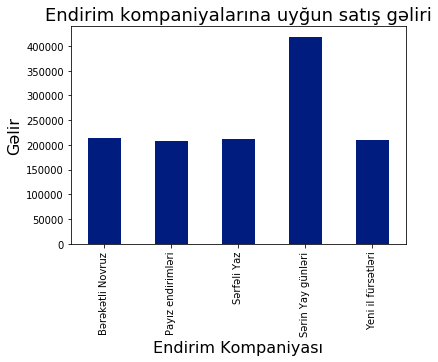

In [9]:
table=mehsul.groupby("endirim_kompaniya").sum()["mehsul_qiymet"]
table.plot(kind='bar')
plt.title('Endirim kompaniyalarına uyğun satış gəliri',fontsize=18)
plt.ylabel('Gəlir',fontsize=16)
plt.xlabel('Endirim Kompaniyası',fontsize=16)
plt.style.use('seaborn-dark-palette')


### Tapşrıq 8.

Bəzi alıcılar kompotların qiymətlərinin baha olduğunu bildirirlər. Zəhmət olmasa, bizdə satılan bütün kompot növlərinin qiymətini və ümumi satış sayını cədvəl şəklində hazırlayın.

In [5]:
kompot=mehsul[mehsul["mehsul_kateqoriya"].str.contains("Komp",na=False)]
table2=kompot.groupby("mehsul_ad").mean()["mehsul_qiymet"]
table3=kompot.groupby("mehsul_ad").count()["satish_kodu"]
table_final=pd.concat([table2,table3],axis=1).reset_index()
table_final.rename(columns={"satish_kodu": "satish_sayi"}).sort_values("mehsul_qiymet",ascending=False)

,mehsul_ad,mehsul_qiymet,satish_sayi
17,BIZIM TARLA 650ML NAR SIRESI,2.50,28
1,BAGDAN 1LT NAR SIRESI S/Q,2.15,31
11,BIZIM TARLA 1LT KOMPOT 1+1 ENDIRIMLI,1.99,29
57,VITA 1000 1LT SAFTALI MEYVE SIRESI S/Q,1.78,26
0,BAGDAN 1LT MULTIMEYVE MEYVE SIRESI S/Q,1.75,29
2,BAGDAN 1LT SAFTALI MEYVE SIRESI S/Q,1.75,31
3,BIZIM TARLA 1LT ALBALI KOMPOTU S/Q,1.50,29
12,BIZIM TARLA 1LT QIRMIZI ALCA KOMPOTU S/Q,1.50,29
6,BIZIM TARLA 1LT FEYXOA KOMPOTU S/Q,1.50,45
16,BIZIM TARLA 1LT ZOGAL KOMPOTU S/Q,1.50,28


### Tapşrıq 9.

Ötən ilki Novruz endirim kompaniyamıza baxaq, görək, müştərilər daha çox hansı kateqoriyadan olan məhsulları alıblar, bu il də onlara üstünlük verək. Mmm, yaxşı olardı ki, hansı məhsullarla birlikdə, bu məhsullar hansı filiallarımızdan nə qədər alınıb, bunu da bilək ki, həmin filiallara o məhsulları daha çox stoklayaq. Müəllim, bu ikisini zəhmət olmasa, birlikdə bizə asan başa düşülən qrafik şəklində hazırlayardız.


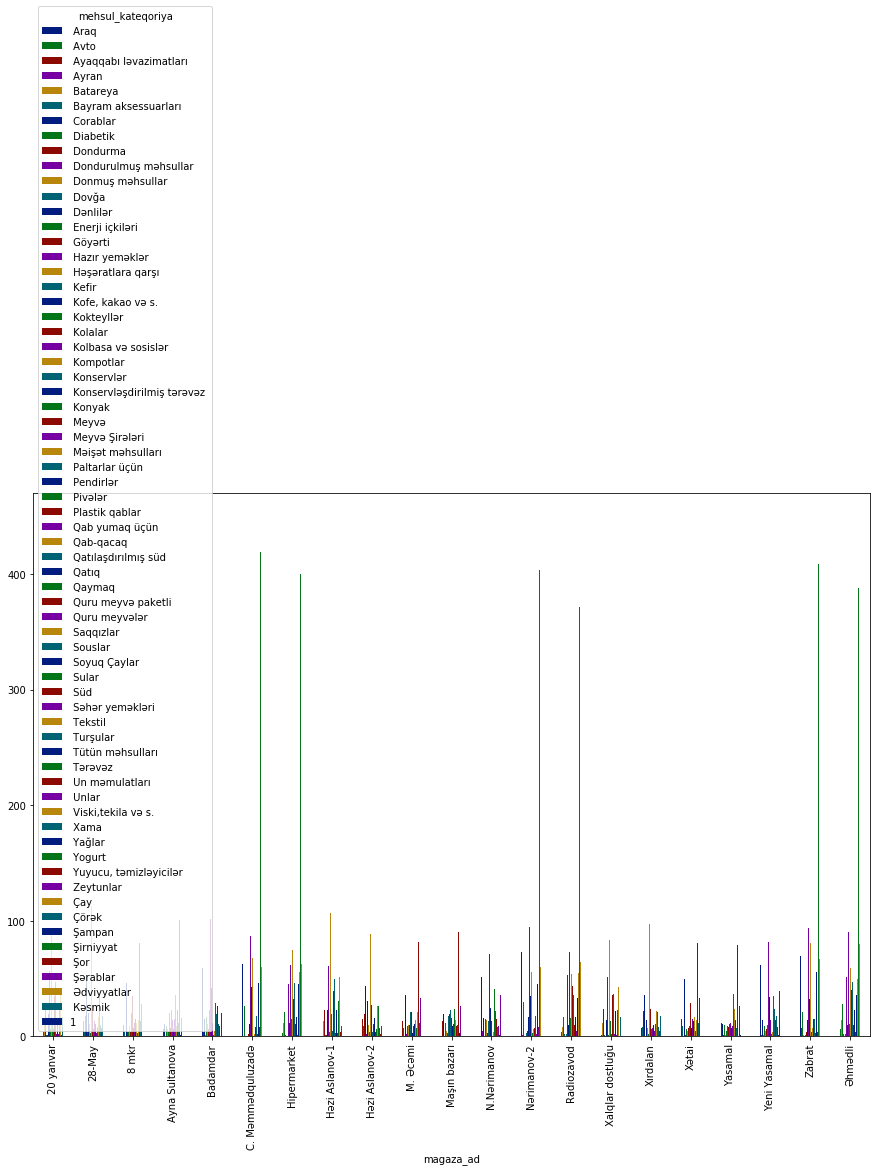

In [10]:
import seaborn as sns
novruz=mehsul[mehsul["endirim_kompaniya"].str.contains("Novruz",na=False)]
novruz_mehsul=novruz.groupby(["magaza_ad","mehsul_kateqoriya"]).size().reset_index()
novruz_mehsul.rename(columns={0:"mehsul_sayi"},inplace=True)
dfpivot=novruz_mehsul.pivot(index="magaza_ad",columns="mehsul_kateqoriya",values="mehsul_sayi")
dfpivot.plot(kind="bar",figsize=(15,10))

### Tapşrıq 11.

Bu sevindiricidirki, müştərilərimizin əksəriyyəti bonus kartdan istifadə edir, lakin bəzi marketlərimdə bonus kartla alış – veriş edənlərin sayı azdır. Bütün marketlərimiz üzrə il ərzində bonus kartla satış sayını və mağaza adlarını bir cədvəldə hazırlayın. Bonus kartla satış sayını azdan çoxa sıralayın ki, az olan marketlərimizdə bonus karta cəlb edən reklam lövhələri asaq.


In [ ]:
bonus=mehsul[mehsul["bonus_kart"]==True]
bonus=bonus.groupby("magaza_ad").count()["satish_kodu"].to_frame().reset_index().sort_values(by="satish_kodu",ascending=True)
bonus.rename(columns={"satish_kodu":"bonuslu_satish_sayi"},inplace=True)
bonus

### Tapşrıq 12.

Zəhmət olmasa,radiozavod mağazamızda il ərzində 40+ azn alış-veriş edən müştərilərin sayının aylardan asılılığını qrafik şəklində göstərin.

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


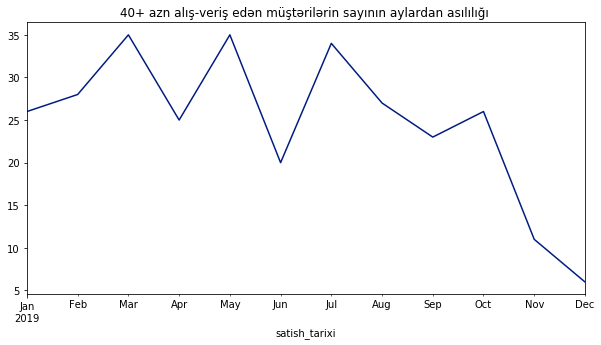

In [17]:
radiozavod=mehsul[mehsul["magaza_ad"].str.contains("Radio")]
radiozavod40=radiozavod[radiozavod["mehsul_qiymet"]>40.00]
radiozavod40.groupby("satish_kodu").sum()["mehsul_qiymet"].reset_index()
radiozavod40["satish_tarixi"]=pd.to_datetime(radiozavod40["satish_tarixi"])
radiozavod40=radiozavod40.set_index("satish_tarixi")
plt.rcParams['figure.figsize'] = (10, 5)
radiozavod40.satish_kodu.resample('M').count().plot(kind='line',title="40+ azn alış-veriş edən müştərilərin sayının aylardan asılılığı ")


### Tapşrıq 13.

Mənə elə gəlir ki, əksər müştərilərimiz daha ucuz məhsullar aldıqda bonus kartdan istifadəyə elə də maraqlı deyillər. Zəhmət olmasa, məhsul qiyməti ilə bonus kartı arasında hər hansı korrelyasiya olub-olmadığını mənə bildirin.

In [47]:
correlation = mehsul.mehsul_qiymet.corr(mehsul.bonus_kart,method='pearson') 
print("Correlation is ",correlation,"which shows that bonus and mehsulqiymet have weak corrrelation")

Correlation is  0.002914287845073361 which shows that bonus and mehsulqiymet have weak corrrelation


### Tapşrıq 14.

Bütün filiallarımızın fasadına hər kateqoriyadan bir məhsul olmaqla məhsullarımızın reklam lövhələrini quraşdıracağıq, lakin daha faydalı olar ki, ötən il ərzində hər bir filialımızdan hər bir kateqoriya üzrə ən çox hansı məhsul alınıbsa, həmin filialımızın reklam lövhəsinə o məhsulu əlavə edək.

In [4]:
df=mehsul.groupby(["magaza_ad","mehsul_kateqoriya"])["mehsul_ad"].agg(lambda x:x.value_counts().index[0]).to_frame()
df.head(10)


mehsul_ad
magaza_ad mehsul_kateqoriya                                                          
20 yanvar  Araq                                                  XAN 0.7LT ARAQ CINAR
           Avto                           AIR FRESHENERS - 104  AVTO TERAVETLENDIRICI
           Ayaqqabı ləvazimatları              SILVER EXPRESS 6ML QUBKA-BLESK RENGSIZ
           Ayran                                       MPRO S.D. 900ML AYRAN 1.5% T/P
           Batareya                                  GP ALKALINE BATAREYA 2LI A76-2C2
           Bayram aksessuarları               PAP STAR PARTY FEELINGS SAM REQEM.19302
           Corablar                                                    SARDUNYA CORAB
           Diabetik                         PETRODIET 300GR SUSHKI S MAKOM NA SORBITE
           Dondurma                 DONDURMA LAZZMASTER 85GR KLASSIK PLOMBIR SOKOL...
           Dondurulmuş məhsullar          S PILU S JARU 420GR BLINCIKI S TVOROQOM 6LI

### Tapşrıq 15.

Bildiyiniz kimi, keçən il Azgranata şirkəti ilə tərəfdaşlıq müqaviləsi imzalaşıq ki, bu müqaviləyə əsasən ötən il mağazalarımızda VITA 1000 şirələrinin satışını həyata keçirdik. Bu ilki sifariş sayını müəyyənləşdirmək üçün ötənilki məlumatlardan istifadə labüddür, zəhmət olmasa Meyvə Şirələri kateqoriyası üzrə ümumi satışın neçə faizinin VITA 1000 şirələrinin payına düşdüyünü piechart şəklində göstərin. Lakin diqqətli olun, digər məhsulların daxilində də VITA sözü mövcud olduğundan yanlış nəticə ola bilər, bizə yalnız VITA 1000 şirələrinin satış faizi gərəklidir.

([<matplotlib.patches.Wedge at 0x11a4f3af048>,
 [Text(-0.10006221962656271, -1.2459885842989917, 'Diger meyve sireleri'),
  Text(0.08805463778008275, 1.0964699634579227, 'VITA 1000 sireleri')],
 [Text(-0.06003733177593762, -0.7475931505793949, '97.4%'),
  Text(0.04802980242549968, 0.5980745255225033, '2.6%')])

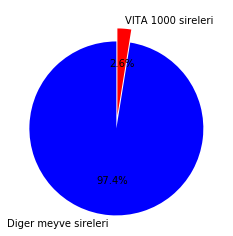

In [6]:
meyve_siresi=mehsul[mehsul["mehsul_kateqoriya"].str.contains("Meyvə")]
vita1000=meyve_siresi[meyve_siresi.mehsul_ad.str.contains("VITA"and"1000")]
sire=meyve_siresi["mehsul_qiymet"].sum()
vita=vita1000["mehsul_qiymet"].sum()
proportions = [sire,vita]
plt.pie(proportions,labels = ['Diger meyve sireleri', 'VITA 1000 sireleri'],
    shadow = False,    colors = ['blue','red'],explode = (0.15 , 0),    startangle = 90,    autopct = '%1.1f%%')
    


### Tapşrıq 16.

Datasetdə satış tarixlərindən istifadə edərək, həftə günlərini müəyyən edə bilərsiz? Elə yaxşı olar ki, yeni sütun olaraq həftə günləri yaradasız.

In [19]:
from datetime import datetime
mehsul["satish_tarixi"]=pd.to_datetime(mehsul["satish_tarixi"])
mehsul["heftegunu"]=mehsul.satish_tarixi.dt.strftime("%A")
mehsul["heftegunu"]


0           Friday
1           Friday
2           Friday
3           Friday
4           Friday
            ...   
438821      Sunday
438822    Thursday
438823    Thursday
438824    Thursday
438825    Thursday
Name: heftegunu, Length: 438826, dtype: object

### Tapşrıq 17.

Bizim 24 saat açıq filiallarımızda gecə kifayət qədər satış yoxdursa gecə növbəsin ləğv edək. Zəhmət olmasa, ümumilikdə il ərzində gecə 23:00-dan səhər 06:00 -a qədərhansı marketimizdə neçə manatlıq satış olduğunu bizə qrafik şəklində göstərin. Yaxşı olardı ki, qrafikdə mağazalar satış nəticələrinə görə üç kateqoriyaya : yaxşı, orta, pis olaraq bölünsün.

In [ ]:
mehsul=mehsul.set_index("satish_tarixi")
mehsul.between_time('23:00','06:00').groupby("magaza_ad").sum()["mehsul_qiymet"].plot(kind="bar",figsize=(15,10))


### Tapşrıq 18.

Endirim kampaniyaları çərçivəsində hansı məhsul kateqoriyası liderlik edib? Zəhmət olmasa, hər bir kampaniya üçün ayrılıqda olmaqla məsələni həll edin

In [29]:
mehsul.groupby("endirim_kompaniya")["mehsul_kateqoriya"].agg(lambda x:x.value_counts().index[0]).to_frame()



,mehsul_kateqoriya
endirim_kompaniya,
Bərəkətli Novruz,Şirniyyat
Payız endirimləri,Şirniyyat
Sərfəli Yaz,Şirniyyat
Sərin Yay günləri,Şirniyyat
Yeni il fürsətləri,Şirniyyat


### Tapşrıq 19.

Ümumi il ərzində üzrə ən çox satış hansı mağazada reallaşıb?

In [119]:
mehsul.groupby("magaza_ad").sum()["mehsul_qiymet"].sort_values(ascending=False).reset_index().rename(columns={"mehsul_qiymet":"satish_deyeri"})
#len(mehsul.satish_kodu)
#s=s.to_frame()
#s.sum()438826

,magaza_ad,satish_deyeri
0,Həzi Aslanov-2,124951.53
1,N.Nərimanov,123949.24
2,Əhmədli,122992.90
3,M. Əcəmi,122541.97
4,Yasamal,122380.08
5,Xalqlar dostluğu,121773.19
6,28-May,121706.06
7,Yeni Yasamal,121519.07
8,C. Məmmədquluzadə,121329.87
9,Nərimanov-2,121203.39


### Tapşrıq 20.

2019-cu il ərzində aylar üzrə ortalama satışın göstəriciləri neçədir?

In [33]:
mehsul.mehsul_qiymet.resample("M").sum().to_frame().rename(columns={"mehsul_qiymet":"satish_deyeri"})



,satish_deyeri
satish_tarixi,
2019-01-31,239610.43
2019-02-28,220552.41
2019-03-31,243054.03
2019-04-30,230158.52
2019-05-31,238731.58
2019-06-30,235930.37
2019-07-31,239202.53
2019-08-31,245141.08
2019-09-30,235464.42


### Tapşrıq 21.

Bonus kartı olan və olmayan müştərilər üzrə ortalama satış miqdarı neçədir?

In [79]:
bonusyes=mehsul[mehsul["bonus_kart"]==True]
bonusno=mehsul[mehsul["bonus_kart"]==False]
val1=bonusyes.mehsul_qiymet.sum()
val2=bonusno.mehsul_qiymet.sum()


1268975.23  |   1267417.1699999997


### Tapşrıq 22.

Keçən il mağazalarımıza mütamadi çörək təchizatı ilə bağlı problem yaşayırdıq. Bir çox halarda, müştərilərin çox olan vaxtında artıq çörəklər bitmiş olur, bəzən isə uyğun olmayan vaxtda gətirilən çörəklər növbəti günə qalırdı. Bu il bu problemin yaranmasını istəmirəm, zəhmət olmasa ötən il hər bir filial üzrə 3 saatdan bir neçə çörək satıldığını qrafik və ya cədvəl şəklində hazırlayın.

In [ ]:
from datetime import timedelta
df=mehsul[mehsul["mehsul_kateqoriya"].str.contains("Çör")]
df=df.reset_index()
df.groupby(["magaza_ad",df.satish_tarixi.dt.Timedelta("3H")]).sum()["mehsul_qiymet"]
